Projet Numérique
==============
Soit $f: \mathbb{R}^2 \to \mathbb{R}^2$ définie par
$$
f(x) = 
\left(
\begin{matrix}
x_1(\alpha -\beta x_2)  \\
-x_2(\gamma-\delta x_1)
\end{matrix}
\right)
$$

Question 1
---------------
On résout 
$$
f(x) = 0
$$
ce qui donne les points d'équilibre $(0,0)$ et $\bar{x}=\left(\frac{\gamma}{\delta},\frac{\alpha}{\beta} \right)$.

La jacobienne de la dynamique est donnée par
$$
J_f(x) = 
\left(
\begin{matrix}
\alpha -\beta x_2 & -\beta x_1 \\
\delta x_2 & -(\gamma-\delta x_1)
\end{matrix}
\right)
$$
En $(0,0)$,
$$
J_f(0,0) = 
\left(
\begin{matrix}
\alpha & 0 \\
0 & -\gamma
\end{matrix}
\right)
$$
a pour valeurs propres $\alpha>0$, donc $(0,0)$ est instable. Par contre, en $\bar{x}$,
$$
J_f(\bar{x}) = 
\left(
\begin{matrix}
0 & -\beta\frac{\gamma}{\delta} \\
\delta\frac{\alpha}{\beta} & 0
\end{matrix}
\right)
$$
a des valeurs propres imaginaires pures $\pm i\sqrt{\alpha\gamma}$, donc a priori on ne peut rien dire sur la stabilité du système nonlinéaire.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy import interpolate

%matplotlib notebook 

In [2]:
def f(alpha, beta, gamma, delta, x: np.ndarray) -> np.ndarray:
    return np.array([x[0] * (alpha - beta * x[1]),
                     - x[1] * (gamma - delta * x[0])])

alpha_0, beta_0 = 2/3.0, 4/3.0
gamma_0, delta_0 = 1.0, 1.0
params_0 = (alpha_0, beta_0, gamma_0, delta_0)

f_demo = partial(f, *params_0)

def equilibrium(alpha, beta, gamma, delta):
    return np.array([gamma / delta, alpha / beta])

x_eq_demo = equilibrium(alpha_0, beta_0, gamma_0, delta_0)


In [3]:
print(f_demo(x_eq_demo))
print(f_demo(np.array([0.0, 0.0])))
print(f_demo(x_eq_demo * 0.5))

[ 0. -0.]
[ 0. -0.]
[ 0.16666667 -0.125     ]


<IPython.core.display.Javascript object>


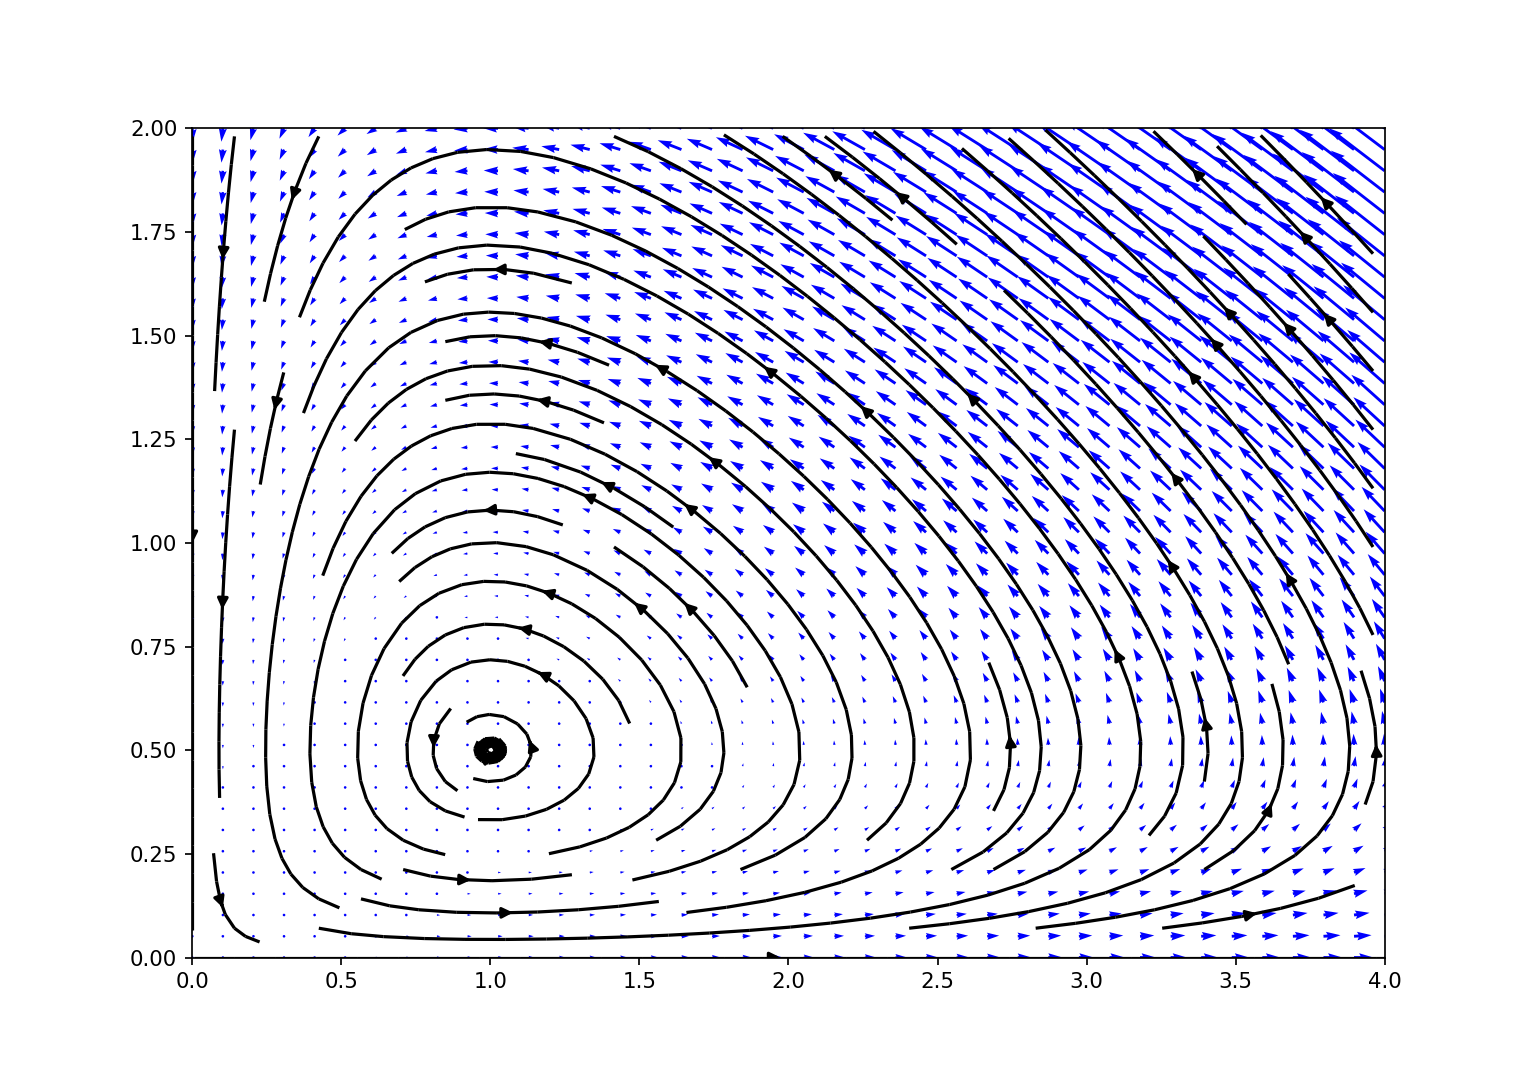

In [4]:
n_grid = 40
x_max, y_max = x_eq_demo * 4.0
X = np.linspace(0.0, x_max, n_grid)
Y = np.linspace(0.0, y_max, n_grid)
U, V = np.meshgrid(X, Y)
U, V = f_demo([U, V])

plt.figure(figsize=(10, 7))
plt.quiver(X, Y, U, V, color='b')
plt.streamplot(X, Y, U, V, color='k')
plt.xlim([0.0, x_max])
plt.ylim([0.0, y_max])
plt.show()

Question 3
---------------
(Correction Pauline)
Soit $x_0=(0,x_{2,0})\in \{0\}\times \mathbb{R}_{\geq 0}$ sur l'axe des ordonnées. Puisque $f$ est $C^1$ sur $\mathbb{R}^2$, par le théorème de Cauchy-Lipschitz, le problème de Cauchy associé à la condition initiale $(t_0,x_0)$ pour un $t_0$ quelconque, admet une **unique** solution du type
$$
x(t) = (0, x_2(t))
$$
avec $x_2$ solution de 
$$
\dot{x}_2 = -\gamma x_2
$$

De même, pour $x_0=(x_{1,0},0)\in \mathbb{R}_{\geq 0}\times \{0\}$, le problème de Cauchy associé pour un $t_0$ quelconque, admet une **unique** solution du type
$$
x(t) = (x_1(t), 0)
$$
avec $x_1$ solution de 
$$
\dot{x}_1 = \alpha x_1
$$

Il s'ensuit qu'une solution initialisée dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ ne pourra pas croiser l'axe des abscisses ou des ordonnées (car elle donnerait alors une autre solution). Elle reste donc dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$.

Question 4
----------------
On a:
$$(\nabla H(x_1, x_2), f(x_1, x_2)) = (\delta x_1 - \gamma) (\alpha - \beta x_2) - (\beta x_2 - \alpha) (\gamma - \delta x_1) = 0$$

Ainsi, $H$ est constante, égal à $H_0 = H(x_1(0), x_2(0))$. Notons alors:

$$\phi_{c} : x \in \mathbb{R} \rightarrow x - c \ln x \in \mathbb{R}.$$

Cette fonction a un minimum en $x^* = c$, est décroissante avant $x^*$, croissante après $x^*$, et diverge quand $x \rightarrow 0$ et $x \rightarrow +\infty$.

On a alors:
$$\delta \phi_{\gamma/\delta}(x_1) = \delta x_1 - \gamma \ln x_1 = H_0 - (\beta x_2 - \alpha \ln x_2) \leq H_0 - \beta \phi_{\alpha/\beta}(\alpha / \beta)$$

$$\beta \phi_{\alpha / \beta}(x_2) = \beta x_2 - \alpha \ln x_2 = H_0 - (\delta x_1 - \gamma \ln x_1) \leq H_0 - \delta \phi_{\gamma / \delta}(\gamma / \delta)$$

Ainsi, comme $x_1 \rightarrow \phi_{\gamma/\delta}(x_1)$ et $x_2 \rightarrow \phi_{\alpha / \beta}(x_2)$ sont majorées, d'après les variations des fonctions $\phi_c(.)$ pour $c > 0$, on en déduit que $x_1$ et $x_2$ sont bornés tels que:

$$0 < \underline{x}_1 \leq x_1 \leq \bar{x}_1 \text{ et } 0 < \underline{x}_2 \leq x_2 \leq \bar{x}_2$$

Par conséquent:

- la distance entre $x(t)$ et le bord du domaine (ie $\min\{x_1, x_2\}$) est minorée par un réel strictement positif,

- la norme de $x(t)$ est majorée.

Ainsi, d'après le théorème du domaine d'existence maximal, si la solution maximale $x(.)$ est définie sur un domaine de la forme $]t_m^-, t_m^+[$, nécessairement: $t_m^+ = +\infty$.

Question 5
----------

<IPython.core.display.Javascript object>


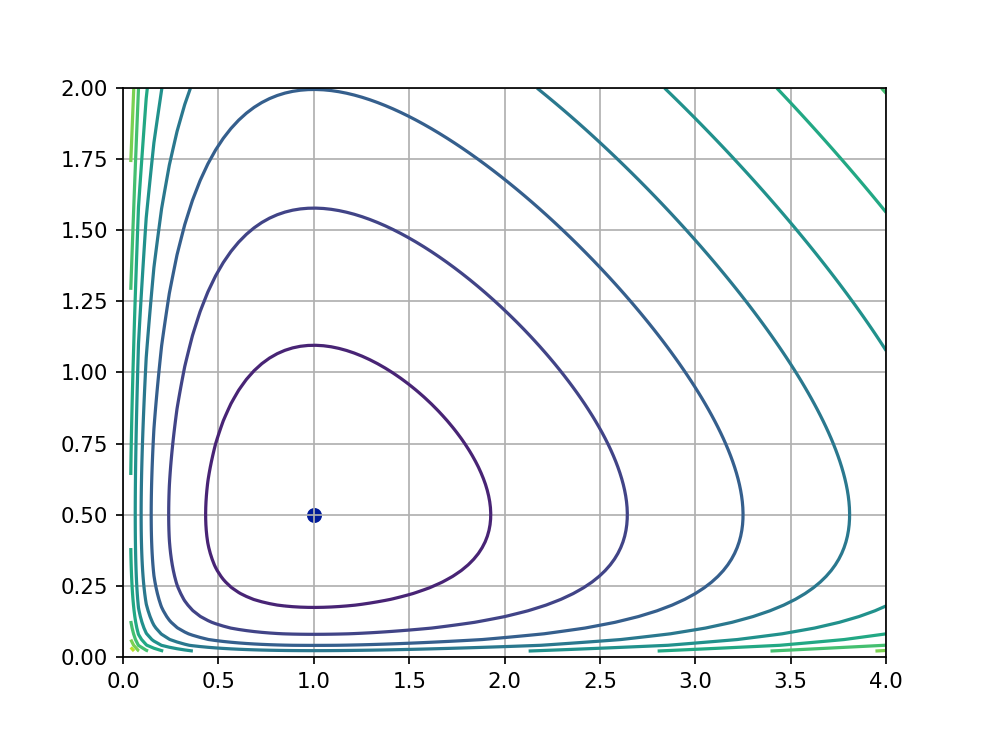

In [5]:
plt.figure()

def H(alpha, beta, gamma, delta, x: np.ndarray) -> float:
    return delta * x[0] - gamma * np.log(x[0]) + beta * x[1] - alpha * np.log(x[1])

H_demo = partial(H, *params_0)

n_grid = 100
x_max, y_max = x_eq_demo * 4.0
X = np.linspace(0.0, x_max, n_grid)[1:]
Y = np.linspace(0.0, y_max, n_grid)[1:]
X, Y = np.meshgrid(X, Y)

plt.contour(X, Y, H_demo([X, Y]), levels=10)

plt.scatter(x_eq_demo[0], x_eq_demo[1], color=(0.0, 0.1, 0.6))

plt.xlim([0.0, x_max])
plt.ylim([0.0, y_max])
plt.grid()
plt.show()



L'équilibre $\bar{x}$ se trouve au milieu des courbes de niveau (car c'est en fait le minimum de $H$). Donc si on se donne $\varepsilon >0$, on peut trouver $\eta_H>0$ tel que $H(x)<\eta_H$ implique $|x-\bar{x}|<\varepsilon$. On en déduit que pour toute condition initiale telle que $H(x_0)<\eta_H$, la trajectoire reste à une distance inférieure à $\varepsilon$ de $\bar{x}$. Par ailleurs, l'ensemble des courbes des niveaux de $H$ inférieures à $\eta_H$ constituent bien un voisinage de $\bar{x}$ donc $\bar{x}$ est stable par définition.

Question 6
----------

In [6]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    N = int(tf / dt)
    states = np.empty((x0.size, N + 1))
    times = dt * np.arange(N + 1, dtype=np.float)
    states[:, 0] = x0
    for k in range(N):
        states[:, k + 1] = states[:, k] + dt * f(times[k], states[:, k])
    return times, states

Avancement: 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 


<IPython.core.display.Javascript object>


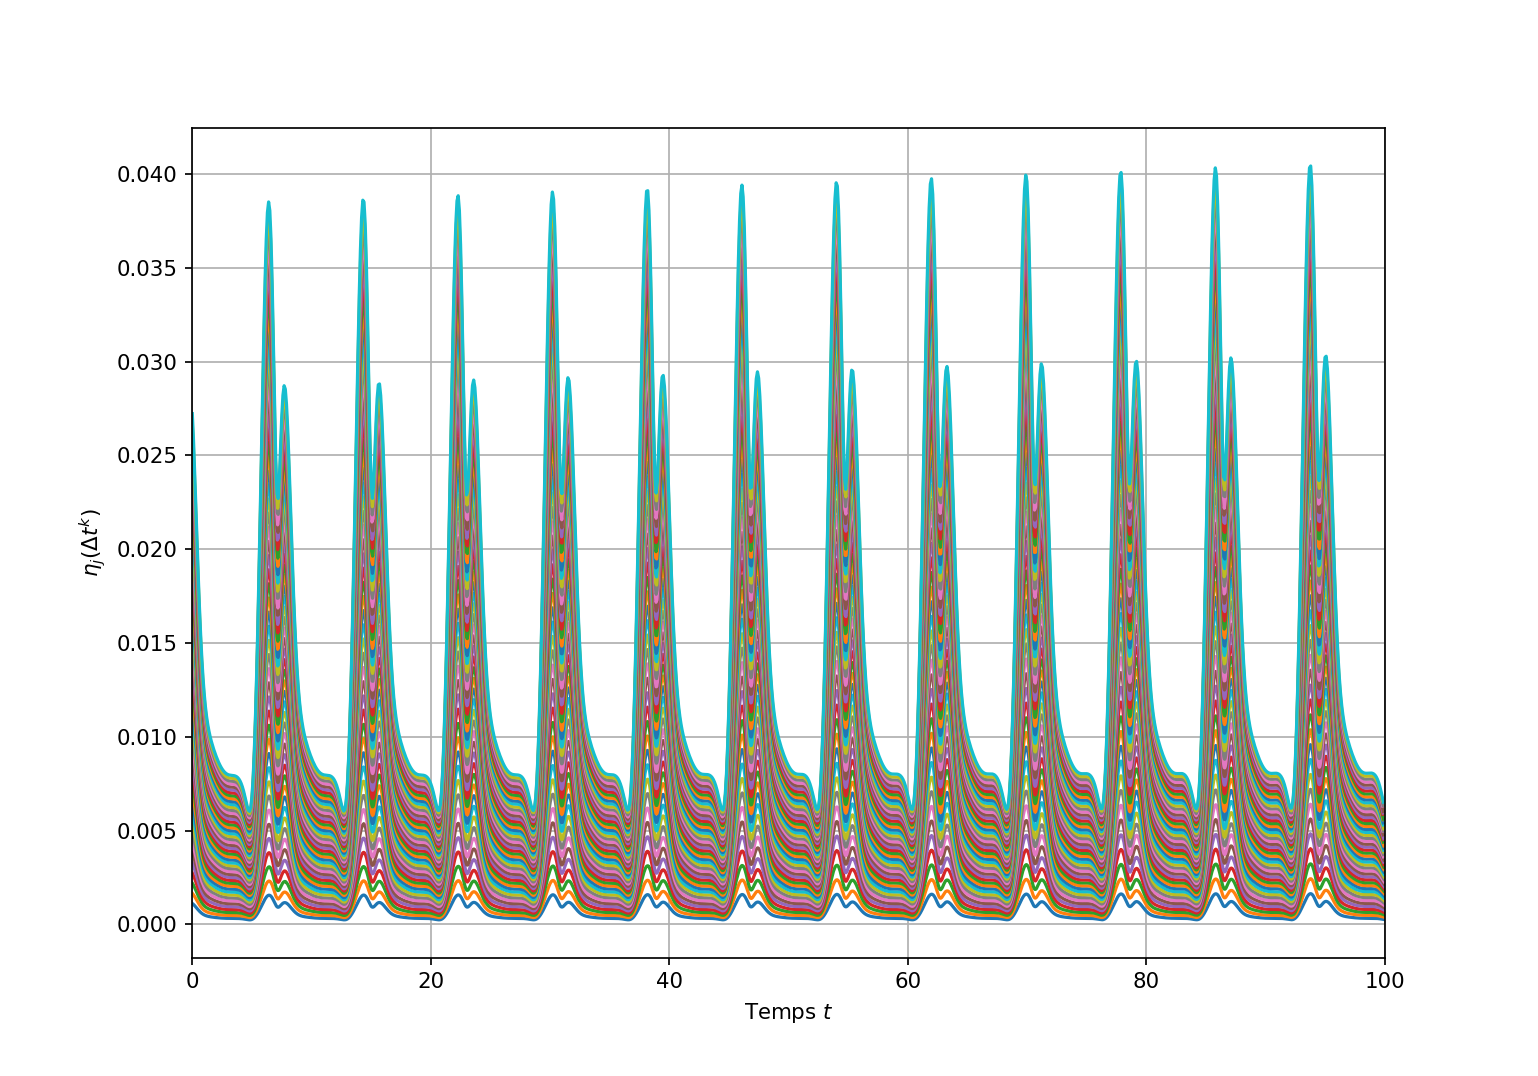

<IPython.core.display.Javascript object>


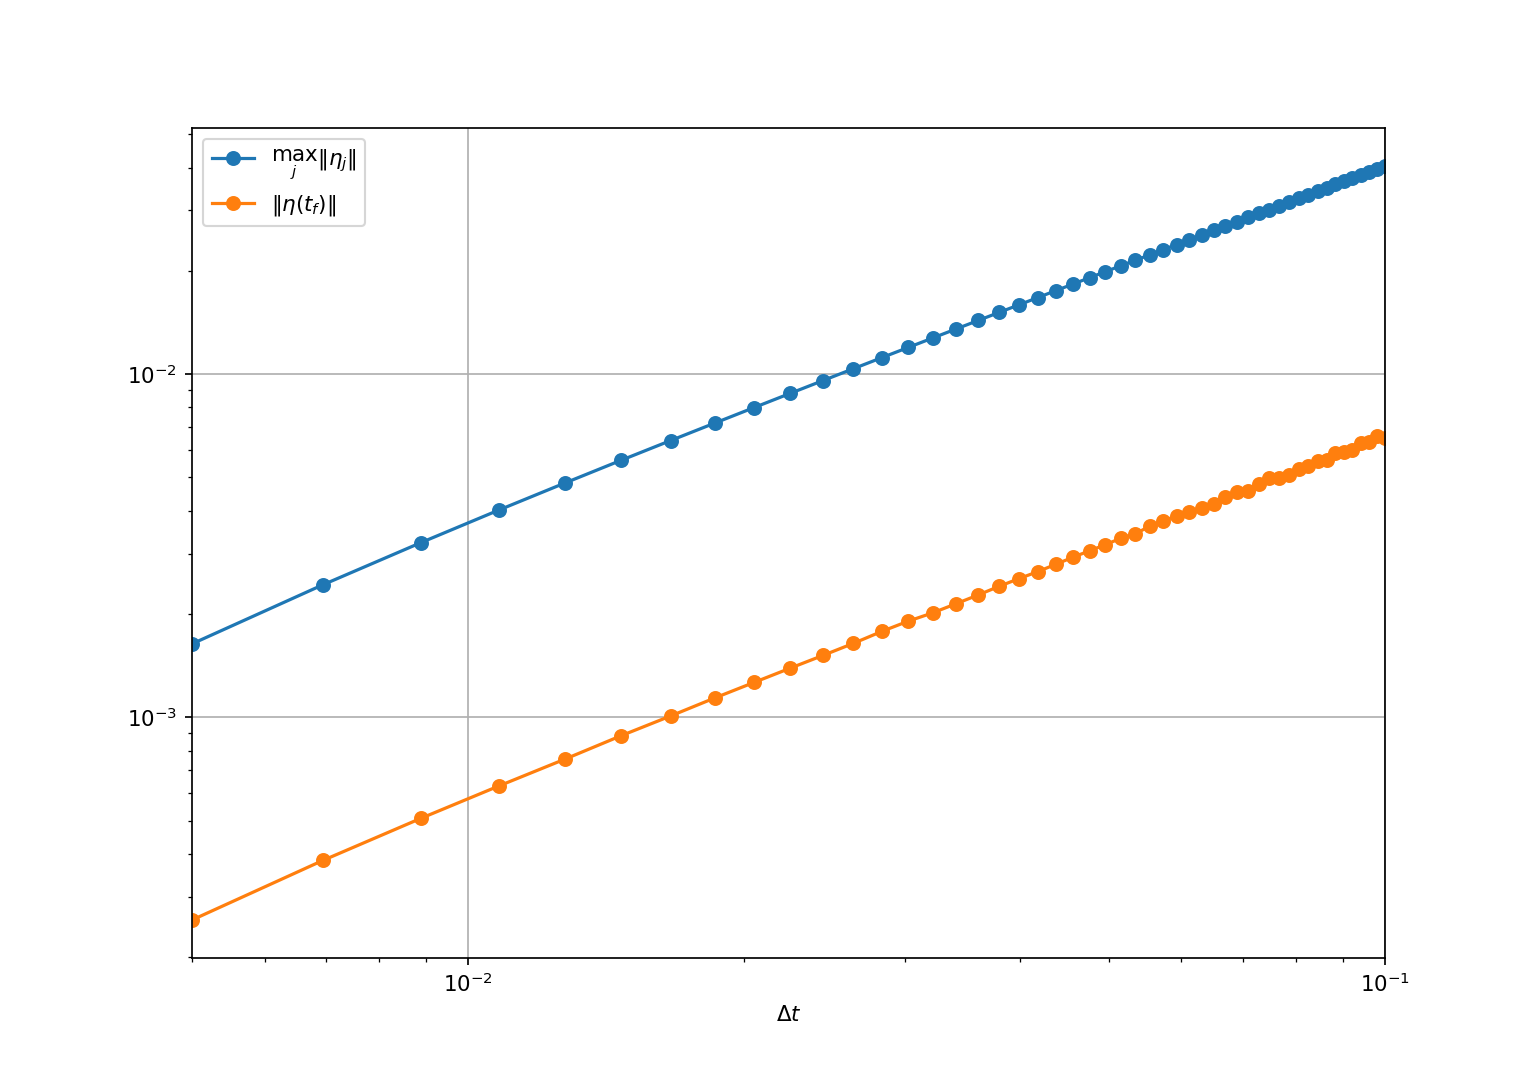

In [7]:
n = 50  # Nombre de pas de temps différents sur lequel estimer eta_j

t0, x0 = 0.0, np.array([0.9, 0.9])

dt, tf = 0.001, 100.0
t_opt, x_opt_tmp = solve_euler_explicit(lambda _t, _x: f_demo(_x), x0, dt, t0, tf)
x_opt_0 = interpolate.interp1d(t_opt, x_opt_tmp[0])
x_opt_1 = interpolate.interp1d(t_opt, x_opt_tmp[1])

# x_opt est la fonction "de référence",
# ie qu'on considère comme étant la vraie solution.
def x_opt(_t):
    return np.array([x_opt_0(_t), x_opt_1(_t)])

dt_arr = np.linspace(0.005, 0.1, n)

eta = list()
times = list()

print("Avancement: ")
for k in range(n):
    print(f"{k}, ", end='')
    dtk = dt_arr[k]
    tk, x_k = solve_euler_explicit(lambda _t, _x: f_demo(_x), x0, dtk, t0, tf)
    Nk = x_k.shape[1] - 1
    eta_k = np.empty((Nk,))
    for j in range(Nk):
        eta_k[j] = np.linalg.norm((x_opt(tk[j + 1]) - x_opt(tk[j]) - dtk * f_demo(x_opt(tk[j]))) / dtk)
    
    eta.append(eta_k)
    times.append(tk[:-1])
print("")

## Chart 1 ##

plt.figure(figsize=(10, 7))

for k in range(n):
    plt.plot(times[k], eta[k])

plt.grid(True)
plt.xlabel("Temps $t$")
plt.ylabel("$\eta_j(\Delta t^k)$")
plt.xlim([0.0, tf])
plt.show()


## Chart 2 ##

plt.figure(figsize=(10, 7))
plt.plot(dt_arr, [np.max(e) for e in eta],
         marker='o', label=r'$\max_j \Vert \eta_j \Vert$')
plt.plot(dt_arr, [e[-1] for e in eta],
         marker='o', label=r'$\Vert \eta(t_f) \Vert$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.xlim([np.min(dt_arr), np.max(dt_arr)])
plt.xlabel(r"$\Delta t$")
plt.show()



Question 8
---------------

In [8]:
def rel_err(a, b):
    return np.linalg.norm(b - a) / np.linalg.norm(a)

def solve_euler_implicit(f, x0, dt, t0, tf, max_iter=100, tol=1e-5):
    N = int(tf / dt)
    states = np.empty((x0.size, N + 1))
    times = dt * np.arange(N + 1, dtype=np.float)
    states[:, 0] = x0
    for k in range(N):
        x_tmp = states[:, k]
        for i in range(max_iter):
            x_new = states[:, k] + dt * f(times[k], x_tmp)
            if rel_err(x_tmp, x_new) < tol:
                x_tmp = x_new
                break
            x_tmp = x_new
        states[:, k + 1] = x_tmp
    return times, states

Questions 7 + 8
----------------
(Application)

<IPython.core.display.Javascript object>


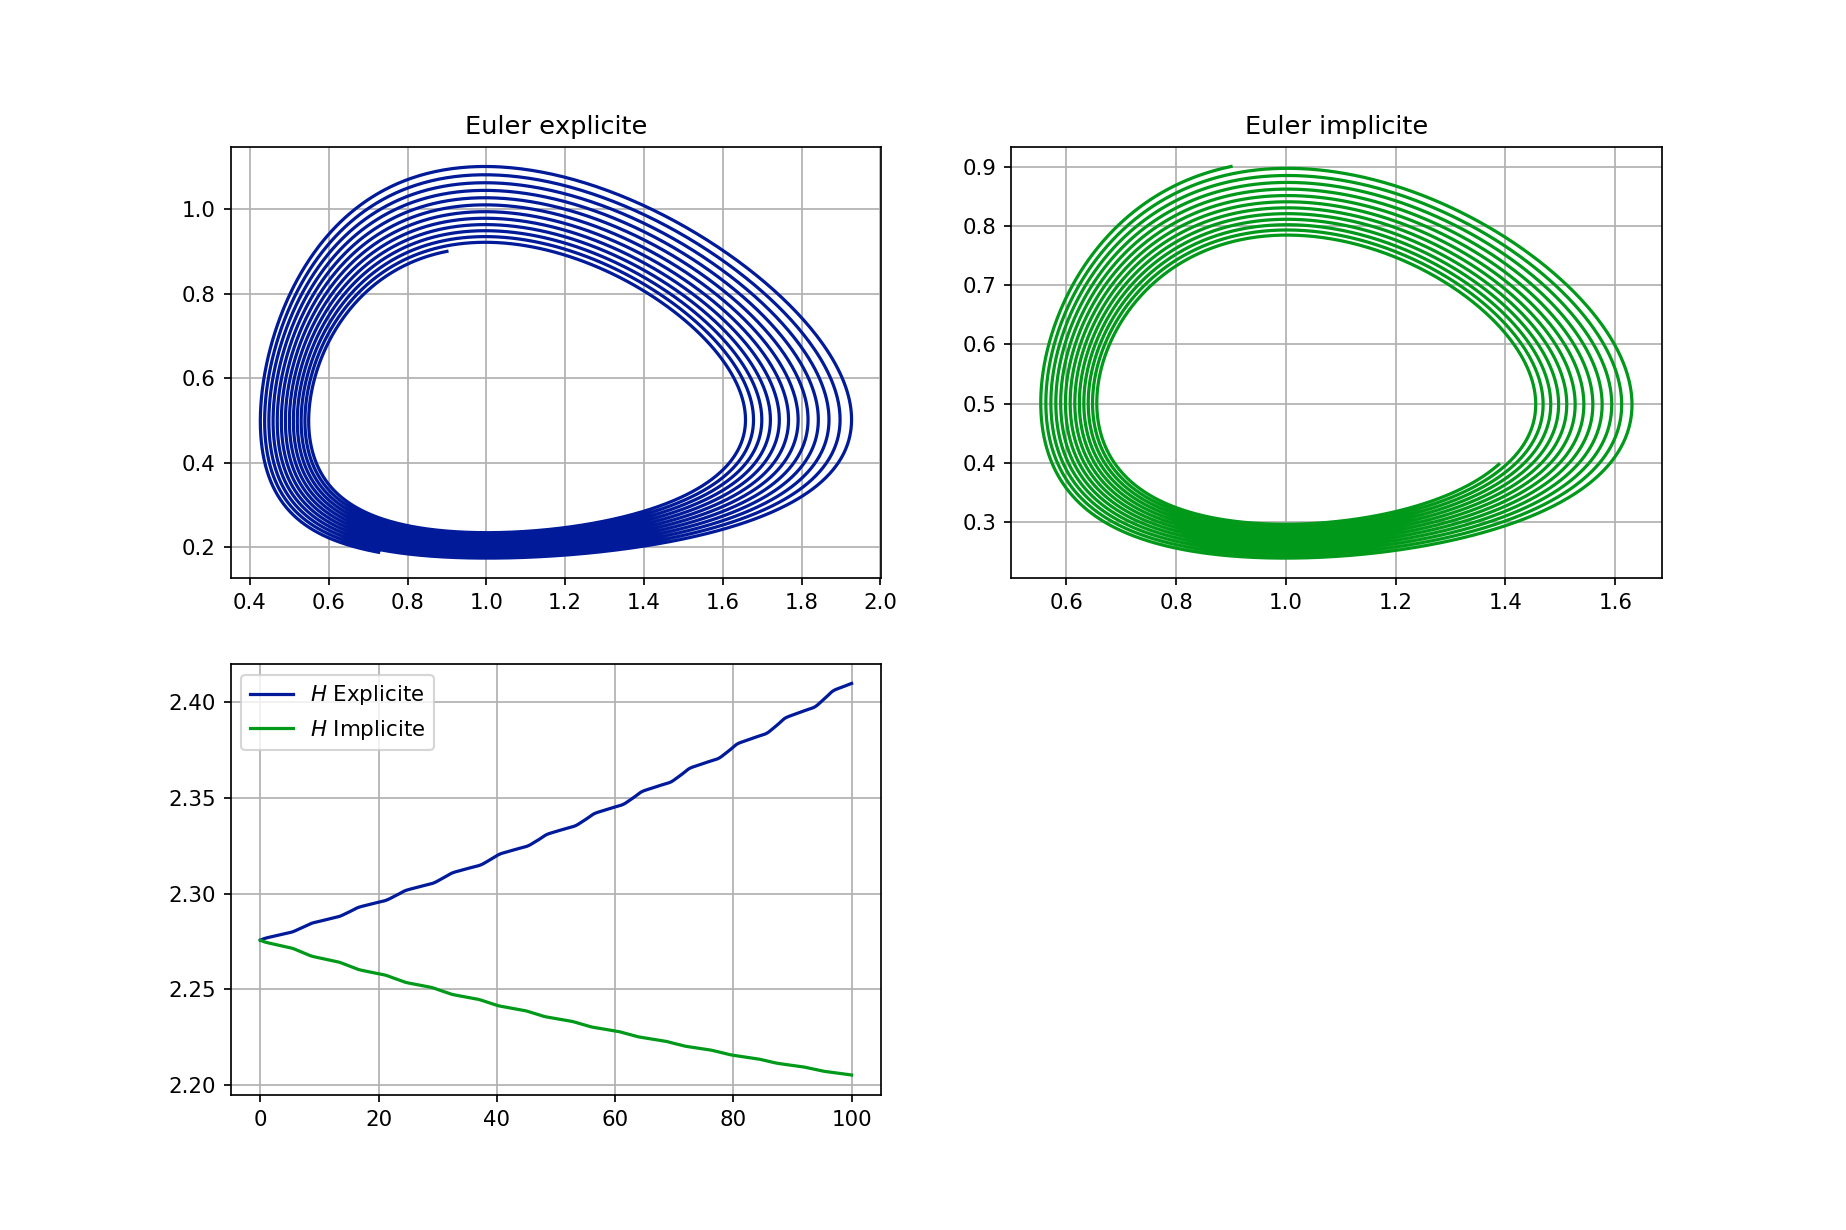

In [9]:
t0, x0 = 0.0, np.array([0.9, 0.9])
dt, tf = 0.01, 100.0
te, xe = solve_euler_explicit(lambda _t, _x: f_demo(_x), x0, dt, t0, tf)
ti, xi = solve_euler_implicit(lambda _t, _x: f_demo(_x), x0, dt, t0, tf)

ce, ci = (0.0, 0.1, 0.6), (0.0, 0.6, 0.1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axs[0, 0].plot(xe[0], xe[1], color=ce)
axs[0, 0].set_title("Euler explicite")

axs[0, 1].plot(xi[0], xi[1], color=ci)
axs[0, 1].set_title("Euler implicite")

axs[1, 0].plot(te, H_demo(xe), color=ce, label=r"$H$ Explicite")
axs[1, 0].plot(ti, H_demo(xi), color=ci, label=r"$H$ Implicite")
axs[1, 0].legend()

fig.delaxes(axs[1, 1])

for i in range(2):
    for j in range(2):
        axs[i, j].grid(True)

plt.show()

Euler modifié
============

Question 9
-----------

Si $x(.)$ est la solution de $\dot{x} = f(x)$, on sait que $H(x(.)) = cste$. Ainsi, si $H_0 = H(x(0))$, $x(.)$ satisfait aussi:

$$\dot{x} = f(x) - u(x) (H(x) - H_0)$$

Inversement, si $u(.)$ est $C^1(\mathbb{R}^2)$, la fonction $x \rightarrow \tilde{f}(x) = f(x) + u(x) (H(x) - H_0)$ est aussi $C^1(\mathbb{R}^2)$, et donc les solutions de $\dot{x} = \tilde{f}(x)$ sont uniques (à la condition initiale près).

D'où l'équivalence des solutions de $\dot{x} = f(x)$ et $\dot{x} = \tilde{f}(x)$ quand $H_0 = H(x(0))$.

Question 10
-----------
Comme $\nabla H(x)^T f(x) = 0$, on obtient:

$$\frac{d}{dt}(H(x(t)) - H_0) = \langle H(x), f(x) - u(x) (H(x) - H_0)\rangle = - \nabla H(x)^T u(x) (H(x) - H_0)$$

Ainsi, en prenant $u(x) = k \nabla H(x)$, on obtient bien la relation demandée.


On note alors que:
$$
\nabla H(x) = 0 \quad \Longleftrightarrow \quad x=\bar{x}
$$
et s'il existe $\epsilon>0$ tel que $\|x(t)-\bar{x}\|>\epsilon$ pour tout $t$ alors il existe $\delta>0$ tel que $\| \nabla H(x(t))\|>\delta$ pour tout $t$. On a alors
$$
\frac{d}{dt}(H(x(t))-H_0) \leq -k\delta^2 (H(x(t))-H_0)
$$
et donc
$$
\left[\frac{d}{dt}(H(x(t))-H_0)+k\delta^2 (H(x(t))-H_0)\right] e^{k\delta^2 t} \leq 0
$$
soit
$$
\frac{d}{dt}\left[  (H(x(t))-H_0)e^{k\delta^2 t} \right] \leq 0
$$
et donc finalement:

$$ (H(x(t))-H_0) \leq (H(x(0))-H_0)e^{-k\delta^2 t}.$$


Question 11
--------------

In [10]:

def stabilized_f(params, x0, k=1.0):
    
    f_tmp = partial(f, *params)
    H_tmp = partial(H, *params)
    
    alpha, beta, gamma, delta = params
    H_0 = H_tmp(x0)
    
    def grad_H(_x):
        return np.array([delta - gamma / _x[0], beta - alpha / _x[1]])
    
    def f_stab(_x):
        return f_tmp(_x) - k * grad_H(_x) * (H_tmp(_x) - H_0)
    
    return f_stab

# def solve_euler_implicit_stable(params, x0, dt, t0, tf, max_iter=100, tol=1e-5, k=1.0):
    
#     f_tmp = partial(f, *params)
#     alpha, beta, gamma, delta = params
#     H_tmp = partial(H, *params)
#     H_0 = H_tmp(x0)
    
#     N = int(tf / dt)
#     states = np.empty((x0.size, N + 1))
#     times = dt * np.arange(N + 1, dtype=np.float)
#     states[:, 0] = x0
    
#     def u(_x):
#         return k * np.array([delta - gamma / _x[0], beta - alpha / _x[1]])
    
#     for k in range(N):
#         x_tmp = states[:, k]
#         for i in range(max_iter):
#             x_new = states[:, k] + dt * (f_tmp(x_tmp) - u(x_tmp) * (H_tmp(x_tmp) - H_0))
#             if rel_err(x_tmp, x_new) < tol:
#                 x_tmp = x_new
#                 break
#             x_tmp = x_new
#         states[:, k + 1] = x_tmp
#     return times, states

<IPython.core.display.Javascript object>


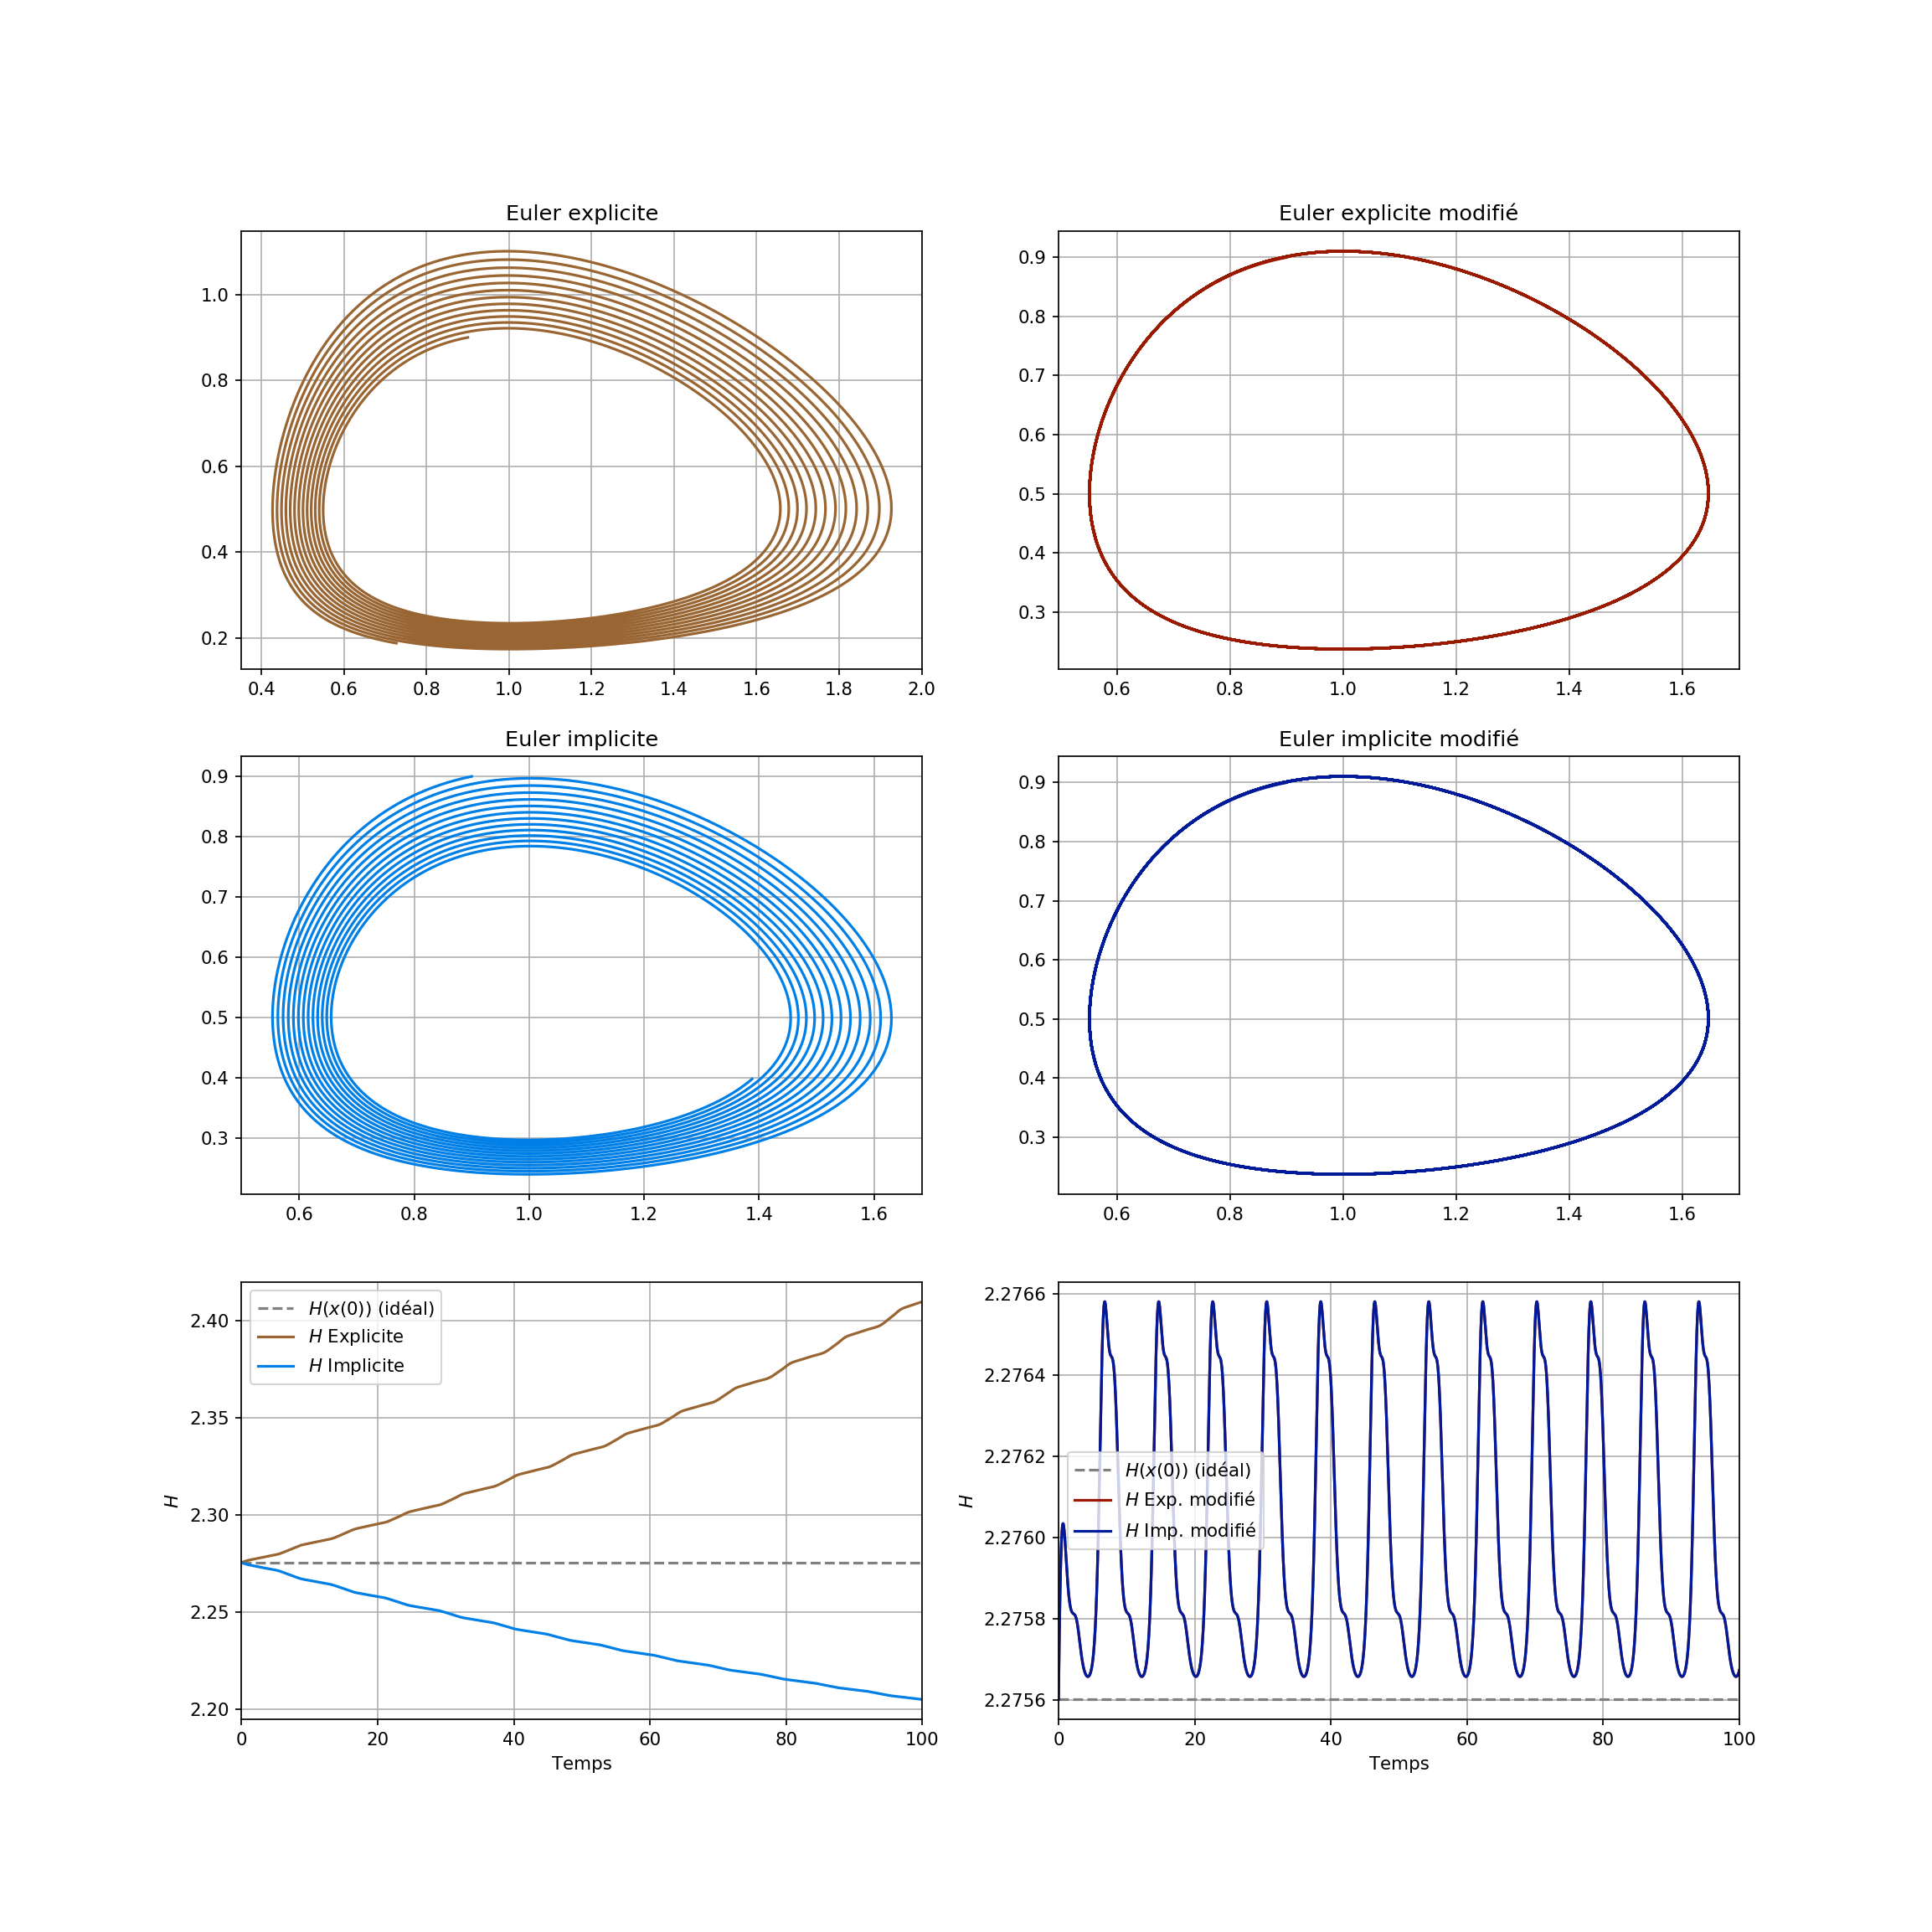

In [11]:
t0, x0 = 0.0, np.array([0.9, 0.9])
dt, tf = 0.01, 100.0
te, xe = solve_euler_explicit(lambda _t, _x: f_demo(_x), x0, dt, t0, tf)
ti, xi = solve_euler_implicit(lambda _t, _x: f_demo(_x), x0, dt, t0, tf)

f_stab = stabilized_f(params_0, x0, k=5.0)
tse, xse = solve_euler_explicit(lambda _t, _x: f_stab(_x), x0, dt, t0, tf)
tsi, xsi = solve_euler_explicit(lambda _t, _x: f_stab(_x), x0, dt, t0, tf)

ce, ci = (0.6, 0.4, 0.2), (0.0, 0.5, 0.9)
cse, csi = (0.6, 0.1, 0.0), (0.0, 0.1, 0.6)

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

axs[0, 0].plot(xe[0], xe[1], color=ce)
axs[0, 0].set_title("Euler explicite")

axs[1, 0].plot(xi[0], xi[1], color=ci)
axs[1, 0].set_title("Euler implicite")

axs[0, 1].plot(xse[0], xse[1], color=cse)
axs[0, 1].set_title("Euler explicite modifié")

axs[1, 1].plot(xsi[0], xsi[1], color=csi)
axs[1, 1].set_title("Euler implicite modifié")

axs[2, 0].plot([t0, tf], [H_demo(x0), H_demo(x0)], label="$H(x(0))$ (idéal)",
               color='gray', linestyle='--')
axs[2, 0].plot(te, H_demo(xe), color=ce, label=r"$H$ Explicite")
axs[2, 0].plot(ti, H_demo(xi), color=ci, label=r"$H$ Implicite")

axs[2, 1].plot([t0, tf], [H_demo(x0), H_demo(x0)], label="$H(x(0))$ (idéal)",
               color='gray', linestyle='--')
axs[2, 1].plot(tse, H_demo(xse), color=cse, label=r"$H$ Exp. modifié")
axs[2, 1].plot(tsi, H_demo(xsi), color=csi, label=r"$H$ Imp. modifié")

for j in range(2):
    axs[2, j].legend()
    axs[2, j].set_xlim([t0, tf])
    axs[2, j].set_xlabel('Temps')
    axs[2, j].set_ylabel(r'$H$')

for i in range(3):
    for j in range(2):
        axs[i, j].grid(True)

plt.show()

Plus $k$ est grand, plus la convergence de $H$ est rapide et donc plus $H$ est forcé de rester proche de sa valeur initiale. Cependant, en notant $H_j=H(x^j)$ le long de la solution numérique du schéma d'Euler, on a 
$$
H_{j+1} = H\left(x^j + dt\left(f(x^j)-k\nabla H(x^j) (H_{j}-H_0)\right) \right)
$$
donc en développant pour $dt$ petit
$$
H_{j+1}-H_0 = H_{j}-H_0 +dt \left\langle\nabla H(x^j), \left(f(x^j)-k\nabla H(x^j) (H_{j}-H_0)\right) \right\rangle + O(dt^2) = (1- k dt\|\nabla H(x^j)\|^2)(H_{j}-H_0) + O(dt^2)
$$
Pour que le schéma soit stable au premier ordre, il faut donc que $k dt\|\nabla H(x^j)\|^2$ reste plus petit que 2 ! 